# Linear Regression

En este Notebook se va a trabajar en regesión lineal simple y múltiple. La data con la que se trabaja fue sacada de Kaggle y se utiliza con fines puramente educativos.


In [83]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

In [65]:
folder = 'linear_regression_files'
file_multiple = 'CarPrice_Assignment.csv'
file_simple = 'Salary_Data.csv'

df_simple = pd.read_csv(f"{folder}/{file_simple}")
df_multiple = pd.read_csv(f"{folder}/{file_multiple}")
df_simple = df_simple.astype('float')

## Simple Linear Regression

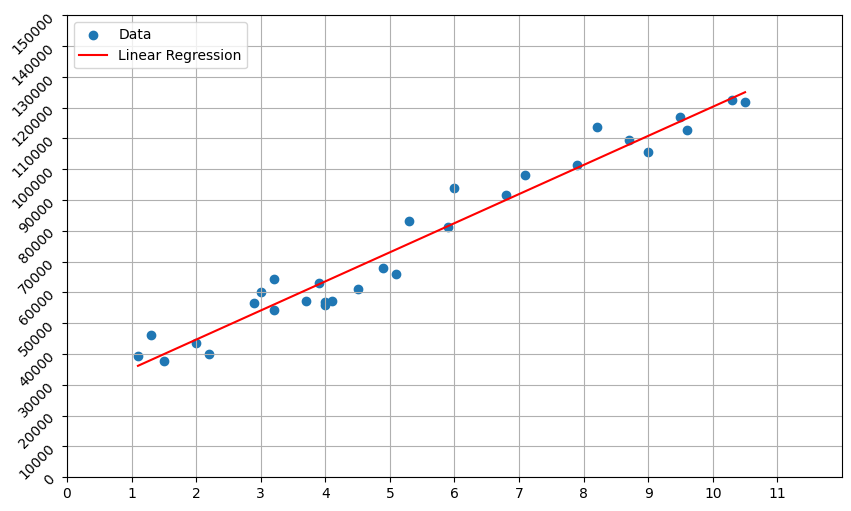

In [82]:
# Manual least squares

def least_squares(x, y):
    b1 = (np.sum((x - np.mean(x))*(y - np.mean(y))))/(np.sum((x - np.mean(x))**2))
    b0 = np.mean(y) - b1*np.mean(x)
    return [b0, b1]

def calculate_error(y_data, y_estimated):
    error = y_data - y_estimated
    return round(np.mean(error), 4)

# Calculate de least squares coefficientss
coeff_estimated = least_squares(df_simple['YearsExperience'], df_simple['Salary'])
y_estimated = df_simple['YearsExperience']*coeff_estimated[1] + coeff_estimated[0]

# Plot
plt.figure(figsize=(10,6))

plt.ylim([0, 150000])
plt.xlim([0, 12])
plt.yticks(np.arange(0, 160000, 10000), np.arange(0, 160000, 10000), rotation=45)
plt.xticks(np.arange(0, 12, 1))
plt.grid()

plt.scatter(df_simple['YearsExperience'], df_simple['Salary'], label='Data')
plt.plot(df_simple['YearsExperience'], y_estimated, color='red', label='Linear Regression')
plt.legend(loc='upper left')

plt.show()

### Usando scikit-learn

In [103]:
lin_reg = sk.linear_model.LinearRegression()

X = df_simple['YearsExperience'].values
print('Shape before reshape: ', X.shape)
X = X.reshape(-1, 1) # Vertical vector
print('Shape after reshape: ', X.shape)
Y = df_simple['Salary']

lin_reg.fit(X , Y)

coeff = [lin_reg.intercept_, lin_reg.coef_] 
# intercep is beta_0
# coef is beta_1 ... beta_n, only beta_1 in simple linear regresion

print(coeff)

Shape before reshape:  (30,)
Shape after reshape:  (30, 1)
[25792.200198668696, array([9449.96232146])]


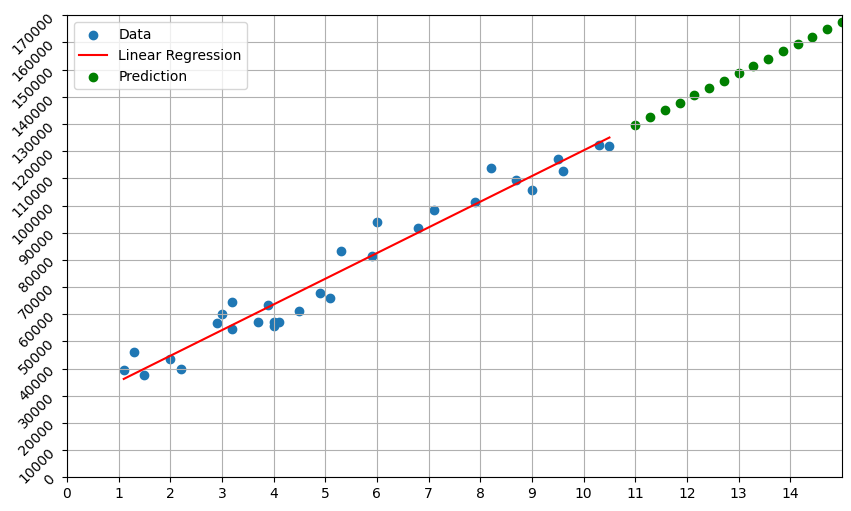

R2 is 0.9569566641435086


In [119]:
# Calculate de least squares coefficientss
Y_est = coeff[0] + X*coeff[1]

# Plot
plt.figure(figsize=(10,6))

plt.ylim([0, 170000])
plt.xlim([0, 15])
plt.yticks(np.arange(0, 180000, 10000), np.arange(0, 180000, 10000), rotation=45)
plt.xticks(np.arange(0, 15, 1))
plt.grid()

plt.scatter(X, Y, label='Data')
plt.plot(X, Y_est, color='red', label='Linear Regression')

# Predict
X_predict = np.linspace(11, 15, 15).reshape(-1, 1)
Y_predict = lin_reg.predict(X_predict)
plt.scatter(X_predict, Y_predict, label='Prediction', color='green')

plt.legend(loc='upper left')
plt.show()

R2 = lin_reg.score(X, Y)
print(f"R2 is {R2}")

Text(0, 0.5, 'Unidades vendidas')

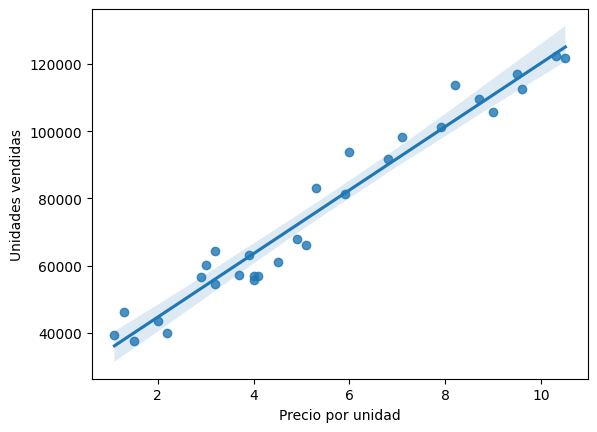

In [135]:
import seaborn as sns
  
ax = sns.regplot(x='YearsExperience', y='Salary', data=df_simple, ci=99)
ax.set_xlabel('Precio por unidad')
ax.set_ylabel('Unidades vendidas')

# plt.plot(X, Y_est, '--', color='r', label="Teorica",)

# Multiple Linear Regresion